In [56]:
from pylab import*

In [57]:
def rk2(f, x0, y0, h, n):
    solutions = [(x0, y0)] 
    for i in range(n):
        x, y = solutions[-1]
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1)
        y_next = y + k2
        x_next = x + h 
        solutions.append((x_next, y_next))
    return solutions

In [60]:
def rk2mod(f,x, y0, h, n):
    for i in range(n):
        y = y0
        y = solutions[-1]
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1)
        y_next = y + k2 
        x_next = x + h 
    return solutions

In [ ]:
def RK_2(edo,x_ini,t):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = sol[i,:] + 0.5*delta*edo(sol[i,:],t[i])
        sol[i+1,:] = sol[i,:] + delta*edo(k1,t[i]+0.5*delta)
    return sol

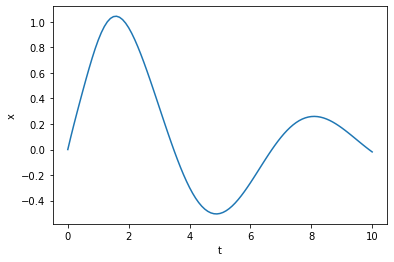

In [64]:


from math import exp, sin
import numpy as np
import matplotlib.pyplot as plt

def func(t, x, v):
    return v, exp(-t)*sin(3*t) - 0.5*v - sin(x)

def eulerSystemSolver(x0, v0, t):
    x = [x0]
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        x0, v0 = x0 + h * func(t[i-1], x0, v0)[0], v0 + h * func(t[i-1], x0, v0)[1]
        x.append(x0)
    return np.array(x)

x0 = 0
v0 = 1
t = np.linspace(0, 10, 101)
x = eulerSystemSolver(x0, v0, t)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

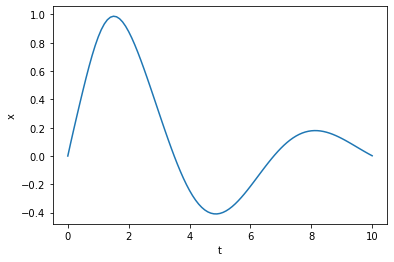

In [66]:
def rungeKutta2(f, t0, x0, v0, t):
    x = [x0]
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1x, k1v = f(t0, x0, v0)
        k2x, k2v = f(t0 + h/2, x0 + h/2 * k1x, v0 + h/2 * k1v)
        x0 = x0 + h * k2x
        v0 = v0 + h * k2v
        t0 = t0 + h
        x.append(x0)
    return np.array(x)

def f(t, x, v):
    return v, exp(-t)*sin(3*t) - 0.5*v - sin(x)

# Initial conditions
t0 = 0
x0 = 0
v0 = 1

# Array of t values at which we need approximations
t = np.linspace(0, 10, 101)

# Calculate approximations
x = rungeKutta2(f, t0, x0, v0, t)

# Plot solution
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

